In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the images between -1 and 1
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

# Create the generator network
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=100),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28 * 28 * 1, activation='tanh')
])

# Create the discriminator network
discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the discriminator network
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Freeze the discriminator network weights
discriminator.trainable = False

# Combine the generator and discriminator into a GAN
gan = tf.keras.Sequential([generator, discriminator])

# Compile the GAN
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
for epoch in range(10):
    # Generate noise samples
    noise = np.random.normal(0, 1, size=(len(x_train), 100))
    
    # Use the generator to generate fake images
    fake_images = generator.predict(noise)
    
    # Train the discriminator on real and fake images
    real_loss = discriminator.train_on_batch(x_train, np.ones((len(x_train), 1)))
    fake_loss = discriminator.train_on_batch(fake_images, np.zeros((len(x_train), 1)))
    discriminator_loss = 0.5 * np.add(real_loss, fake_loss)


1875/1875 [==============================] - 9s 5ms/step


1/1 [==============================] - 0s 20ms/step


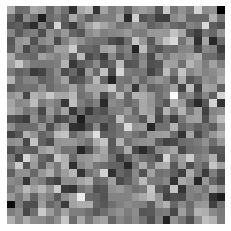

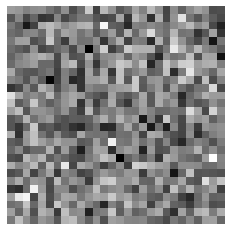

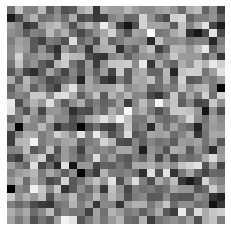

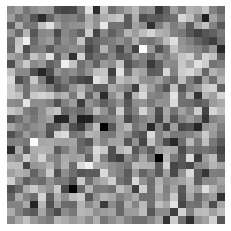

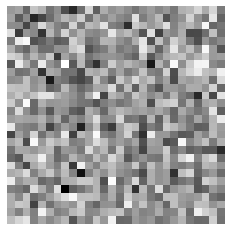

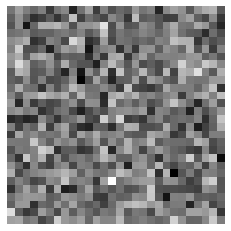

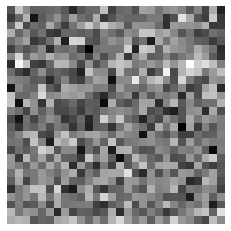

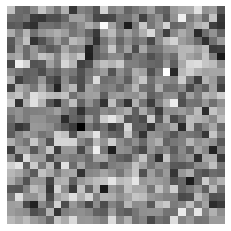

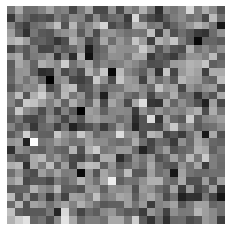

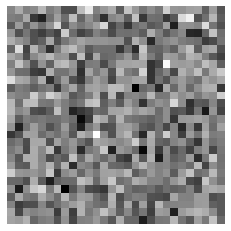

In [56]:
# Generate random noise samples
noise = np.random.normal(0, 1, size=(10, 100))

# Use the generator to generate fake images from the noise
fake_images = generator.predict(noise)

# Plot the fake images
for i in range(10):
    plt.imshow(fake_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()



Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

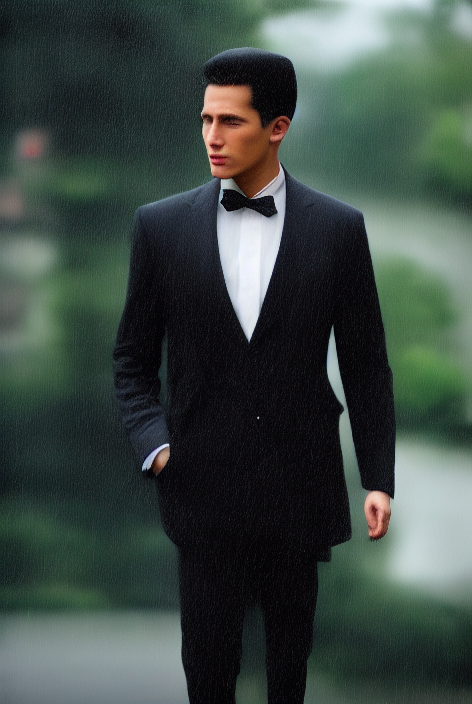

In [44]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

url = "/content/suit.jpg"
def download_image(url):
    image = PIL.Image.open(url)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = download_image(url)
prompt = "what it look like if its same raining"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
images[0]

In [2]:
pip install diffusers accelerate safetensors transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 47.0 MB/s eta 0:00:00
